<a href="https://colab.research.google.com/github/google-research/google-research/blob/master/jax_dft/examples/solve_non_interacting_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Default title text
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Installation

In [ ]:
# For GPU runtime
!pip install --upgrade jax jaxlib==0.1.62+cuda110 -f https://storage.googleapis.com/jax-releases/jax_releases.html

In [ ]:
# Install jax-dft
!git clone https://github.com/google-research/google-research.git
!pip install google-research/jax_dft

# Import

In [7]:
import jax
from jax.config import config
from jax_dft import scf
from jax_dft import utils
import matplotlib.pyplot as plt
import numpy as np

# Set the default dtype as float64
config.update('jax_enable_x64', True)

In [ ]:
print(f'JAX devices: {jax.devices()}')

# Run

total energy: -2.650539439312981


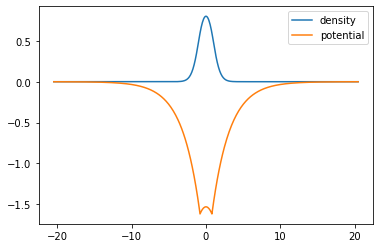

In [14]:
num_electrons = 2 # @param{'type': 'integer'}

grids = np.arange(-256, 257) * 0.08
external_potential = utils.get_atomic_chain_potential(
    grids=grids,
    locations=np.array([-0.8, 0.8]),
    nuclear_charges=np.array([1., 1.]),
    interaction_fn=utils.exponential_coulomb)

density, total_eigen_energies, _ = scf.solve_noninteracting_system(
    external_potential, num_electrons=num_electrons, grids=grids)

print(f'total energy: {total_eigen_energies}')
plt.plot(grids, density, label='density')
plt.plot(grids, external_potential, label='potential')
plt.legend(loc=0)
plt.show()